# Feature Engineering for NLP in Python

## Basic features and readability scores

In [1]:
import pandas as pd

In [2]:
tweets = pd.read_csv('russian_tweets.csv')

In [4]:
tweets.head()

,Unnamed: 0,content,char_count
0,127447,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...,130
1,123642,Muslim Attacks NYPD Cops with Meat Cleaver. Me...,138
2,226970,.@vfpatlas well that's a swella word there (di...,65
3,138339,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...,139
4,161610,Жители обстреливаемых районов Донецка проводят...,131


In [3]:
# Create a feature char_count
tweets['char_count'] = tweets['content'].apply(len)

# Print the average character count
print(tweets['char_count'].mean())

103.462


For your information, there is research that indicates that fake news articles tend to have longer titles! Therefore, even extremely basic features such as character counts can prove to be very useful in certain applications.

In [5]:
ted = pd.read_csv('ted.csv')

In [6]:
ted.head()

,transcript,url
0,"We're going to talk — my — a new lecture, just...",https://www.ted.com/talks/al_seckel_says_our_b...
1,"This is a representation of your brain, and yo...",https://www.ted.com/talks/aaron_o_connell_maki...
2,It's a great honor today to share with you The...,https://www.ted.com/talks/carter_emmart_demos_...
3,"My passions are music, technology and making t...",https://www.ted.com/talks/jared_ficklin_new_wa...
4,It used to be that if you wanted to get a comp...,https://www.ted.com/talks/jeremy_howard_the_wo...


In [7]:
# Function that returns number of words in a string
def count_words(string):
    # Split the string into words
    words = string.split()
    
    # Return the number of words
    return len(words)

# Create a new feature word_count
ted['word_count'] = ted['transcript'].apply(count_words)

# Print the average word count of the talks
print(ted['word_count'].mean())

1987.1


In [12]:
import matplotlib.pyplot as plt

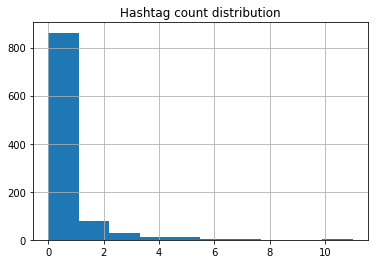

In [13]:
# Function that returns numner of hashtags in a string
def count_hashtags(string):
	# Split the string into words
    words = string.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]
    
    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
tweets['hashtag_count'] = tweets['content'].apply(count_hashtags)
tweets['hashtag_count'].hist()
plt.title('Hashtag count distribution')
plt.show()

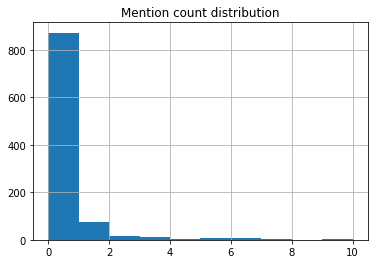

In [14]:
# Function that returns number of mentions in a string
def count_mentions(string):
	# Split the string into words
    words = string.split()
    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]
    
    # Return number of mentions
    return(len(mentions))

# Create a feature mention_count and display distribution
tweets['mention_count'] = tweets['content'].apply(count_mentions)
tweets['mention_count'].hist()
plt.title('Mention count distribution')
plt.show()

Flesch reading ease measures how complex a text is. **The lower the score, the more difficult the text is to read**. The Flesch readability score uses the average length of your sentences (measured by the number of words) and the average number of syllables per word in an equation to calculate the reading ease.

Greater the average sentence length, harder the text is to read

Greater the average number of syllables in a word, harder the text is to read
- I live in my home
- I reside in my  domicile

Higher the score, greater the readability

Gunning fog index

- developed in 1954
- also dependent on average sentence length
- greater the percentage of complex words, harder the text is to read
- higher the index, lesser the readability

In [16]:
!pip install textatistic

  Created wheel for textatistic: filename=textatistic-0.0.1-cp37-none-any.whl size=29056 sha256=df359075b493a383a1e707ab0a07ae0349f04810931e6ae25cdab0d84d70f74c
  Stored in directory: /Users/hakan/Library/Caches/pip/wheels/1d/ec/34/69c3cae349149cd91552c4c470efcbd08bbd21ba30b12e08ab
  Created wheel for pyhyphen: filename=PyHyphen-3.0.1-cp37-cp37m-macosx_10_14_x86_64.whl size=30442 sha256=54cab1c52292ab8775b79191c862a6264e769440678769a78c139259579e0bfc
  Stored in directory: /Users/hakan/Library/Caches/pip/wheels/85/46/93/46c556b5f054568b7470c86c4f76ea628a9a8bdf5a355b9c63
Successfully built textatistic pyhyphen


In [26]:
with open('sisyphus_essay.txt', 'r') as f:
    sisyphus_essay = f.readline()

In [27]:
# Import Textatistic
from textatistic import Textatistic

# Compute the readability scores 
readability_scores = Textatistic(sisyphus_essay).scores

# Print the flesch reading ease score
flesch = readability_scores['flesch_score']
print("The Flesch Reading Ease is %.2f" % (flesch))

The Flesch Reading Ease is 81.67


This indicates that the essay is at the readability level of a 6th grade American student.

In [28]:
readability_scores

{'flesch_score': 81.67466335836913,
 'fleschkincaid_score': 5.485083154506439,
 'gunningfog_score': 7.913698140200286,
 'smog_score': 8.110721755262034,
 'dalechall_score': 7.487433762517882}

In [29]:
t = Textatistic(sisyphus_essay)

In [30]:
t.counts

{'char_count': 6403,
 'word_count': 1398,
 'sent_count': 96,
 'sybl_count': 1824,
 'notdalechall_count': 277,
 'polysyblword_count': 73}

### Readability of various publications

In [43]:
f = open('forbes.txt', 'r'); forbes = f.readline(); f.close();
f = open('harvard_law.txt', 'r'); harvard_law = f.readline(); f.close();
f = open('r_digest.txt', 'r'); r_digest = f.readline(); f.close();
f = open('time_kids.txt', 'r'); time_kids = f.readline(); f.close();

In [45]:
# List of excerpts
excerpts = [forbes, harvard_law, r_digest, time_kids]

# Loop through excerpts and compute gunning fog index
gunning_fog_scores = []
for excerpt in excerpts:
    readability_scores = Textatistic(excerpt).scores
    gunning_fog = readability_scores['gunningfog_score']
    gunning_fog_scores.append(gunning_fog)

# Print the gunning fog indices
print(gunning_fog_scores)

[14.436002482929858, 20.735401069518716, 11.085587583148559, 5.926785009861934]


Notice that the Harvard Law Review excerpt has the highest Gunning fog index; indicating that it can be comprehended only by readers who have graduated college. On the other hand, the Time for Kids article, intended for children, has a much lower fog index and can be comprehended by 5th grade students.

## Text preprocessing, POS tagging and NER